# Time Series 

**[1] Python Datetime module**<br>
- Datetime objects<br>
- Conversion between string and datetime<br>

**[2] Pandas**<br>
- to_datetime<br>
- DatetimeIndex<br>
- Information extraction<br>
- Resample<br>

## [1] Python datetime module

In [1]:
import datetime as dt

- **Datetime obejct creation**

In [2]:
# Use datetime()
mydt = dt.datetime(2021, 7, 1)
mydt

datetime.datetime(2021, 7, 1, 0, 0)

In [3]:
# Get current time by using datetime.now()
datetime_now = dt.datetime.now()
datetime_now

datetime.datetime(2021, 11, 16, 14, 48, 16, 800462)

- **Datetime obejct attributes**

In [4]:
mydt = dt.datetime(year = 2021, month = 7, day = 6, hour = 11, minute = 21)
mydt

datetime.datetime(2021, 7, 6, 11, 21)

In [5]:
print(mydt.year)
print(mydt.month)
print(mydt.day)
print(mydt.hour)
print(mydt.minute)

2021
7
6
11
21


- **Datetime object methods**

In [6]:
# Return (year, week, and weekday)
mydt.isocalendar()

(2021, 27, 2)

In [7]:
# Returns the day of the week as integer 
mydt.isoweekday()

2

In [8]:
# Returns a string
mydt.ctime()

'Tue Jul  6 11:21:00 2021'

- **Datetime object methods - strptime**

In [9]:
string1 = '2019-01-03'
datetime1 = dt.datetime.strptime(string1, '%Y-%m-%d')
datetime1

datetime.datetime(2019, 1, 3, 0, 0)

In [10]:
string2 = '03/01/2019'
datetime2 = dt.datetime.strptime(string2, '%d/%m/%Y')
datetime2

datetime.datetime(2019, 1, 3, 0, 0)

In [11]:
string3 = '03/01/19'
datetime3 = dt.datetime.strptime(string3, '%d/%m/%y')
datetime3

datetime.datetime(2019, 1, 3, 0, 0)

In [12]:
string4 = '10:30 03/01/19'
datetime4 = dt.datetime.strptime(string4, '%H:%M %d/%m/%y')
datetime4

datetime.datetime(2019, 1, 3, 10, 30)

- **Datetime object methods - strftime**<br>

In [13]:
datetime5 = dt.datetime(2019,1,3)
datetime5

datetime.datetime(2019, 1, 3, 0, 0)

In [14]:
string5 = datetime5.strftime('%d-%m-%Y')
string5

'03-01-2019'

- **Timedelta obeject**

In [15]:
# Create two datetime objects
dt1 = dt.datetime(2021,6,15)
dt2 = dt.datetime(2021,7,6)
# Create a timedelta obejct
diff = dt2-dt1
type(diff)

datetime.timedelta

In [16]:
# Access attribute of a timedelta object
diff.days

21

In [17]:
dt_start = dt.datetime.now() 
x = 0
for i in range(0,100000):
    x+=i

dt_end = dt.datetime.now()
(dt_end-dt_start).microseconds

14959

## Exercise.A

**(A.1) Create a datetime object named <code>dt_start</code> with the following arguments: year = 2021, month = 8, day = 15.**

In [41]:
dt_start = dt.datetime(2021, 8, 15)
dt_start

datetime.datetime(2021, 8, 15, 0, 0)

**(A.2) Convert the string <code>30.11.2021</code>to a datetime object named <code>dt_end</code>.**

In [42]:
str1 = '30.11.2021'
dt_end = dt.datetime.strptime(str1, "%d.%m.%Y")
dt_end

datetime.datetime(2021, 11, 30, 0, 0)

**(A.3) How many days are there between <code>dt_start</code> and <code>dt_end</code>.**

In [44]:
(dt_end - dt_start).days

107

## [2] Pandas 

### [2.1] Pandas datetime type

In [18]:
import pandas as pd

- **to_datetime() function**

In [45]:
#(1) dd/mm/yyyy
df1 = pd.DataFrame({"date": ['07/06/2020','26/03/2020','13/10/2020']})
df1

,date
0,07/06/2020
1,26/03/2020
2,13/10/2020


In [47]:
pd.to_datetime(df1["date"], dayfirst = True)

0   2020-07-06
1   2020-03-26
2   2020-10-13
Name: date, dtype: datetime64[ns]

In [21]:
#(Example-2) dd.mmm.yyyy
df2 = pd.DataFrame({"date": ['07.Jun.2020','26.Mar.2020','13.Oct.2020']})
df2

,date
0,07.Jun.2020
1,26.Mar.2020
2,13.Oct.2020


In [22]:
pd.to_datetime(df2["date"])

0   2020-06-07
1   2020-03-26
2   2020-10-13
Name: date, dtype: datetime64[ns]

In [23]:
#(Example-3) yyyy-mm-dd hh:mm:ss
df3 = pd.DataFrame({"date": ['2021-06-01 18:20:13','2021-06-02 07:21:18','2021-06-03 10:20:17']})
df3

,date
0,2021-06-01 18:20:13
1,2021-06-02 07:21:18
2,2021-06-03 10:20:17


In [24]:
pd.to_datetime(df3["date"])

0   2021-06-01 18:20:13
1   2021-06-02 07:21:18
2   2021-06-03 10:20:17
Name: date, dtype: datetime64[ns]

In [48]:
#(Example-4) yyyy-mm.dd (Formats not supported by pandas)
df4 = pd.DataFrame({"date": ['2021-06.01','2021-06.02','2021-06.03']})
df4

,date
0,2021-06.01
1,2021-06.02
2,2021-06.03


In [50]:
pd.to_datetime(df4["date"], format = '%Y-%m.%d')

0   2021-06-01
1   2021-06-02
2   2021-06-03
Name: date, dtype: datetime64[ns]

### [2.2] DatetimeIndex

- **Import dataset with datetime column**

In [27]:
covid_df = pd.read_csv("..\dataset\covid_2021.csv", parse_dates=["date"], index_col = 0)
covid_df.head(10)

,positive
date,
2021-01-01,345
2021-01-02,523
2021-01-03,443
2021-01-04,936
2021-01-05,788
2021-01-06,708
2021-01-07,735
2021-01-08,649
2021-01-09,414


- **Select subset by DatetimeIndex**

In [28]:
# by month
covid_df.loc['2021-05',:].head(5)

,positive
date,
2021-05-01,251
2021-05-02,296
2021-05-03,510
2021-05-04,463
2021-05-05,494


In [29]:
# range
covid_df.loc['2021-05-25':'2021-06-01',:]

,positive
date,
2021-05-25,427
2021-05-26,363
2021-05-27,384
2021-05-28,347
2021-05-29,199
2021-05-30,185
2021-05-31,344
2021-06-01,386


In [30]:
# condition
covid_df[covid_df.index < '2021-01-10']

,positive
date,
2021-01-01,345
2021-01-02,523
2021-01-03,443
2021-01-04,936
2021-01-05,788
2021-01-06,708
2021-01-07,735
2021-01-08,649
2021-01-09,414


- **Line chart**

<AxesSubplot:xlabel='date'>

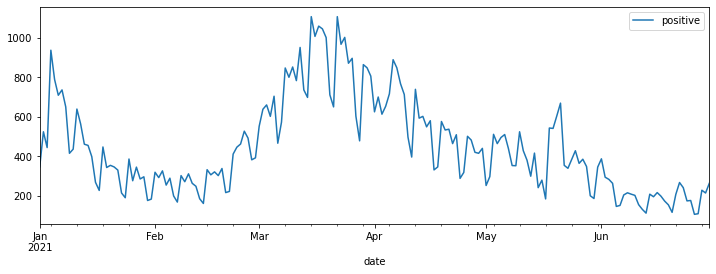

In [31]:
covid_df.plot(y = 'positive', figsize = (12,4))

## Exercise.B

**(B.1) Import dataset <code>fashion.csv</code> and set the column <code>Date</code>as DatetimeIndex.**

In [53]:
fashion_df = pd.read_csv("../dataset/fashion.csv", parse_dates = ["Date"], index_col = 0 )
fashion_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 51 entries, 2014-07-01 to 2018-09-01
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Amanda_Christensen  51 non-null     float64
 1   Calvin_Klein        51 non-null     float64
 2   Eton                51 non-null     float64
 3   J_Lindeberg         51 non-null     float64
 4   Lacoste             51 non-null     float64
 5   Levi_s              22 non-null     float64
 6   Oscar_Jacobson      51 non-null     float64
 7   Ray_Ban             44 non-null     float64
 8   Tiger_of_Sweden     51 non-null     float64
dtypes: float64(9)
memory usage: 4.0 KB


**(B.2) Draw a line chart to show Tiger_of_Sweden’s sales in 2016.**

<AxesSubplot:xlabel='Date'>

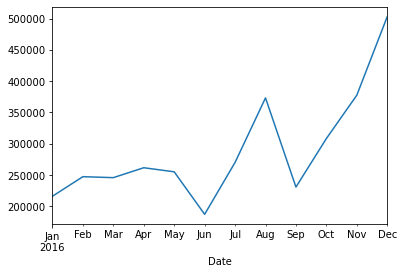

In [56]:
fashion_df.loc["2016","Tiger_of_Sweden"].plot()

**(B.3) Use a multiple line chart to show the sales of Eton, Levi_s, and Tiger_of_Sweden from 2014 to 2016.**

<AxesSubplot:xlabel='Date'>

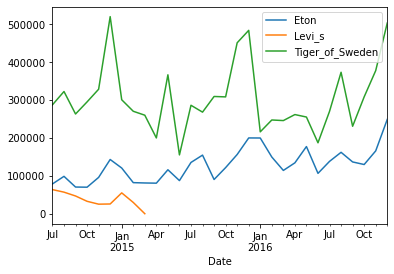

In [59]:
fashion_df.loc["2014":"2016",["Eton","Levi_s","Tiger_of_Sweden"]].plot()

<AxesSubplot:xlabel='Date'>

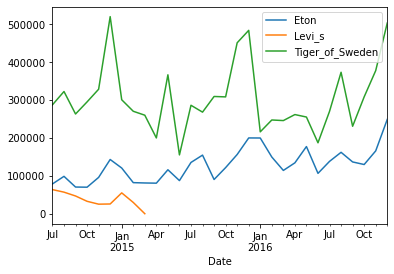

In [61]:
fashion_df.loc["2014":"2016",:].plot(y =["Eton","Levi_s","Tiger_of_Sweden"] )

### [2.3] Information extraction

- **Add new column**

In [32]:
# attribute - weekday
covid_df["week"] = covid_df.index.weekday

In [33]:
# method - day_name()
covid_df["week_name"] = covid_df.index.day_name()

In [34]:
covid_df

,positive,week,week_name
date,,,
2021-01-01,345,4,Friday
2021-01-02,523,5,Saturday
2021-01-03,443,6,Sunday
2021-01-04,936,0,Monday
2021-01-05,788,1,Tuesday
...,...,...,...
2021-06-26,105,5,Saturday
2021-06-27,108,6,Sunday
2021-06-28,227,0,Monday


- **Group data by new column**

In [35]:
covid_df.groupby("week_name").mean().positive

week_name
Friday       480.538462
Monday       521.153846
Saturday     335.961538
Sunday       325.000000
Thursday     476.760000
Tuesday      506.115385
Wednesday    501.961538
Name: positive, dtype: float64

### [2.4] Resampling

- **Aggregate daily data to monthly data**

In [36]:
# Step1: Get a Resampler object  
covid_rs = covid_df.resample('M')
type(covid_rs)

pandas.core.resample.DatetimeIndexResampler

In [37]:
#Step2: Call an aggregate function
covid_month_df = covid_rs.sum()
covid_month_df

,positive,week
date,,
2021-01-31,13138,99
2021-02-28,8709,84
2021-03-31,24853,87
2021-04-30,16610,91
2021-05-31,12082,95
2021-06-30,5966,87


- **Cast to index at a particular frequency**

In [38]:
covid_month_df.index = covid_month_df.index.to_period('M')
covid_month_df

,positive,week
date,,
2021-01,13138,99
2021-02,8709,84
2021-03,24853,87
2021-04,16610,91
2021-05,12082,95
2021-06,5966,87


- **Visualize monthly data**

<AxesSubplot:xlabel='date'>

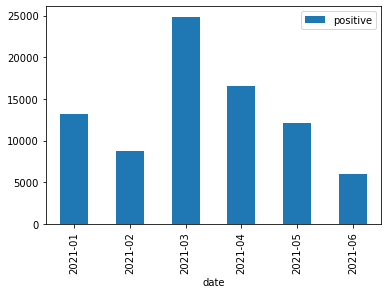

In [39]:
covid_month_df.plot(kind = "bar", y = "positive")

- **Aggregate daily data to weekly data**

In [40]:
covid_df.resample('W').sum()

,positive,week
date,,
2021-01-03,1311,15
2021-01-10,4665,21
2021-01-17,3005,21
2021-01-24,2217,21
2021-01-31,1940,21
2021-02-07,1840,21
2021-02-14,1734,21
2021-02-21,2030,21
2021-02-28,3105,21


## Exercise.C

**(C.1) Use the dataframe <code>fashion_df</code> in Exercise.B. Extract the month information from the DatetimeIndex and add it to a new column named <code>Month</code>.**

In [63]:
fashion_df["Month"] = fashion_df.index.month

In [65]:
fashion_df.head(5)

,Amanda_Christensen,Calvin_Klein,Eton,J_Lindeberg,Lacoste,Levi_s,Oscar_Jacobson,Ray_Ban,Tiger_of_Sweden,Month
Date,,,,,,,,,,
2014-07-01,5744.000,29976.0,78835.127273,89833.846154,65226.40,63884.8,18971.813333,NaN,287420.5664,7
2014-08-01,7372.800,33969.0,98835.054545,153530.892308,43368.68,57153.6,48796.800000,NaN,322481.8272,8
2014-09-01,8881.000,28602.0,70640.000000,146138.461538,26553.20,47048.0,37864.266667,NaN,263211.0544,9
2014-10-01,10693.215,23257.0,70230.181818,151481.846154,37045.60,33032.0,23762.000000,NaN,295135.5360,10
2014-11-01,17121.800,29817.0,96073.745455,180756.000000,35666.80,25476.0,41173.600000,NaN,328531.0160,11


**(C.2) Calculate the average monthly sales of Tiger of Sweden. Display the result with a bar chart.**<br>
Hint: groupby

<AxesSubplot:xlabel='Month'>

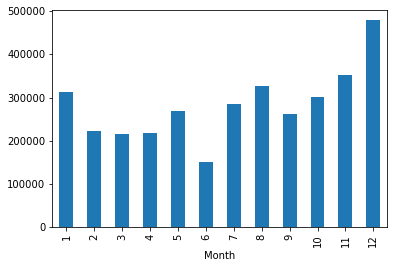

In [68]:
fashion_df.groupby("Month").mean().Tiger_of_Sweden.plot(kind = "bar")

**(C.3) Group the data by year and calculate the annual sales of each brand. Store the result in a new variable named <code>fashion_year_df</code>.**<br>
Hint: resample()

In [71]:
fashion_year_df = fashion_df.resample("Y").sum()
fashion_year_df

,Amanda_Christensen,Calvin_Klein,Eton,J_Lindeberg,Lacoste,Levi_s,Oscar_Jacobson,Ray_Ban,Tiger_of_Sweden,Month
Date,,,,,,,,,,
2014-12-31,84134.415000,1.893595e+05,5.578705e+05,8.661577e+05,2.416571e+05,2.525552e+05,2.183979e+05,0.000000,2.016675e+06,57
2015-12-31,167430.129835,5.941004e+05,1.428274e+06,2.117095e+06,6.407895e+05,8.428000e+04,6.076360e+05,354573.439920,3.659951e+06,78
2016-12-31,191030.996260,1.058004e+06,1.864815e+06,2.952878e+06,8.809577e+05,0.000000e+00,8.366341e+05,635821.624848,3.477013e+06,78
2017-12-31,250064.914292,1.223611e+06,2.175278e+06,3.311648e+06,1.068541e+06,5.657514e+05,1.061889e+06,643401.396000,3.283573e+06,78
2018-12-31,155101.878409,1.227815e+06,1.659610e+06,1.881761e+06,1.010485e+06,3.021841e+06,8.733544e+05,582513.525840,1.999529e+06,45


**(C.4) Use the year as the index of <code>fashion_year_df</code>.**

In [73]:
fashion_year_df.index = fashion_year_df.index.to_period("Y")
fashion_year_df

,Amanda_Christensen,Calvin_Klein,Eton,J_Lindeberg,Lacoste,Levi_s,Oscar_Jacobson,Ray_Ban,Tiger_of_Sweden,Month
Date,,,,,,,,,,
2014,84134.415000,1.893595e+05,5.578705e+05,8.661577e+05,2.416571e+05,2.525552e+05,2.183979e+05,0.000000,2.016675e+06,57
2015,167430.129835,5.941004e+05,1.428274e+06,2.117095e+06,6.407895e+05,8.428000e+04,6.076360e+05,354573.439920,3.659951e+06,78
2016,191030.996260,1.058004e+06,1.864815e+06,2.952878e+06,8.809577e+05,0.000000e+00,8.366341e+05,635821.624848,3.477013e+06,78
2017,250064.914292,1.223611e+06,2.175278e+06,3.311648e+06,1.068541e+06,5.657514e+05,1.061889e+06,643401.396000,3.283573e+06,78
2018,155101.878409,1.227815e+06,1.659610e+06,1.881761e+06,1.010485e+06,3.021841e+06,8.733544e+05,582513.525840,1.999529e+06,45


**(C.5) Display the result obtained in (C.4) with a heatmap</code>.**

<AxesSubplot:xlabel='Date'>

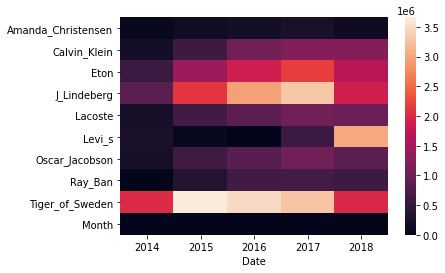

In [75]:
import seaborn as sns
sns.heatmap(data = fashion_year_df.transpose())

In [76]:
fashion_df2 = pd.read_csv("../dataset/fashion.csv", parse_dates = ["Date"] )
fashion_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                51 non-null     datetime64[ns]
 1   Amanda_Christensen  51 non-null     float64       
 2   Calvin_Klein        51 non-null     float64       
 3   Eton                51 non-null     float64       
 4   J_Lindeberg         51 non-null     float64       
 5   Lacoste             51 non-null     float64       
 6   Levi_s              22 non-null     float64       
 7   Oscar_Jacobson      51 non-null     float64       
 8   Ray_Ban             44 non-null     float64       
 9   Tiger_of_Sweden     51 non-null     float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 4.1 KB


In [77]:
fashion_df2.Date.resample("Y").sum()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'